Summarizing the final R-hats

In [2]:
## imports
import pyggdrasil as yg
import jax.numpy as jnp
import jax.random as random
from pathlib import Path
import matplotlib.pyplot as plt
import json
import numpy as np
import xarray as xr
import pandas as pd

# matplotlib inline
import matplotlib
%matplotlib inline
#matplotlib.use('MacOSX')

In [21]:
# import data
datadir = '../../../../../data.nosync/mark02/analysis/rhat/'
filename = 'T_r_6_42/AD/rhat4-MCMCseeds_s42_s12_s34_s79-CS_42-T_r_6_42-200_0.01_0.2_0.0_f_UXR-iTrees_iT_r_6_45_iT_r_6_20_iT_r_6_31_iT_r_6_89-MC_0.01_0.2_10000_0_1-MPC_0.1_0.65_0.25/rhat.json'
fullpath = Path(datadir + filename)
with open(fullpath) as json_file: 
    data = json.load(json_file)

In [23]:
a['result'][-1]dat

1.020211985143417

In [3]:
mutations = [5,10,30,50]
cells = [200,1000, 5000]
noise = ["ideal", "typical", "large"]
similarity = ["AD", "DL"]

# make a xarray to stare rhat values in 4D namely mutations, cells, noise, similarity
rhats = xr.DataArray(np.zeros((len(mutations), len(cells), len(noise), len(similarity))), dims=("mutations", "cells", "noise", "similarity"), coords={"mutations": mutations, "cells": cells, "noise": noise, "similarity": similarity})

# load data
datadir = '../../../../../data.nosync/mark02/analysis/rhat/'

noise_fpr_dic = {"ideal":"1e-06", "typical":"1e-06", "large":"0.01"}
noise_fnr_dic = {"ideal":"1e-06", "typical":"0.1", "large":"0.2"}

for s in similarity:
    for m in mutations:
        for c in cells:
            noise_temp = []
            for n in noise:
                # make filename
                fpr = noise_fpr_dic[n]
                fnr = noise_fnr_dic[n]
                filename = f'T_r_{m+1}_42/{s}/rhat4-MCMCseeds_s42_s12_s34_s79-CS_42-T_r_{m+1}_42-{c}_{fpr}_{fnr}_0.0_f_UXR-iTrees_iT_r_{m+1}_45_iT_r_{m+1}_20_iT_r_{m+1}_31_iT_r_{m+1}_89-MC_{fpr}_{fnr}_10000_0_1-MPC_0.1_0.65_0.25/rhat.json'
                fullpath = Path(datadir + filename)
                with open(fullpath) as json_file: 
                    data = json.load(json_file)
                # get last rhat in chain
                rhat = data['result'][-1]
                # add to xarray rhats
                rhats.loc[dict(mutations=m, cells=c, noise=n, similarity=s)] = rhat
                print(f'{s}, {m}, {c}, {n}, {rhat}')


AD, 5, 200, ideal, 1.0179867915603011
AD, 5, 200, typical, 1.0203139616950767
AD, 5, 200, large, 1.020211985143417
AD, 5, 1000, ideal, 1.015600404127265
AD, 5, 1000, typical, 1.0200268301915962
AD, 5, 1000, large, 1.0200268301915962
AD, 5, 5000, ideal, 1.0162770987401921
AD, 5, 5000, typical, 1.0200268301915962
AD, 5, 5000, large, 1.0200268301915962
AD, 10, 200, ideal, 1.0400975304883253
AD, 10, 200, typical, 1.0274377528374106
AD, 10, 200, large, 1.0418539999137764
AD, 10, 1000, ideal, 1.0296453488451804
AD, 10, 1000, typical, 1.0538188649801625
AD, 10, 1000, large, 1.095655018945933
AD, 10, 5000, ideal, 1.0385408245947543
AD, 10, 5000, typical, 1.0193948187787645
AD, 10, 5000, large, 1.0271909953789469
AD, 30, 200, ideal, 1.5246065165716673
AD, 30, 200, typical, 1.2078691272684474
AD, 30, 200, large, 1.6140707123130988
AD, 30, 1000, ideal, 1.6014826400978472
AD, 30, 1000, typical, 1.3901291184584275
AD, 30, 1000, large, 1.354448178494487
AD, 30, 5000, ideal, 1.4769515258856252
AD, 30

In [3]:
# access rhat values of xarray for 200 cells, tyipical noise and AD similarity
rhats.loc[dict(cells=200, noise="typical", similarity="AD")]

<xarray.DataArray (mutations: 4)>
array([1.02031396, 1.02743775, 1.20786913, 1.65117243])
Coordinates:
  * mutations   (mutations) int64 5 10 30 50
    cells       int64 200
    noise       <U7 'typical'
    similarity  <U2 'AD'

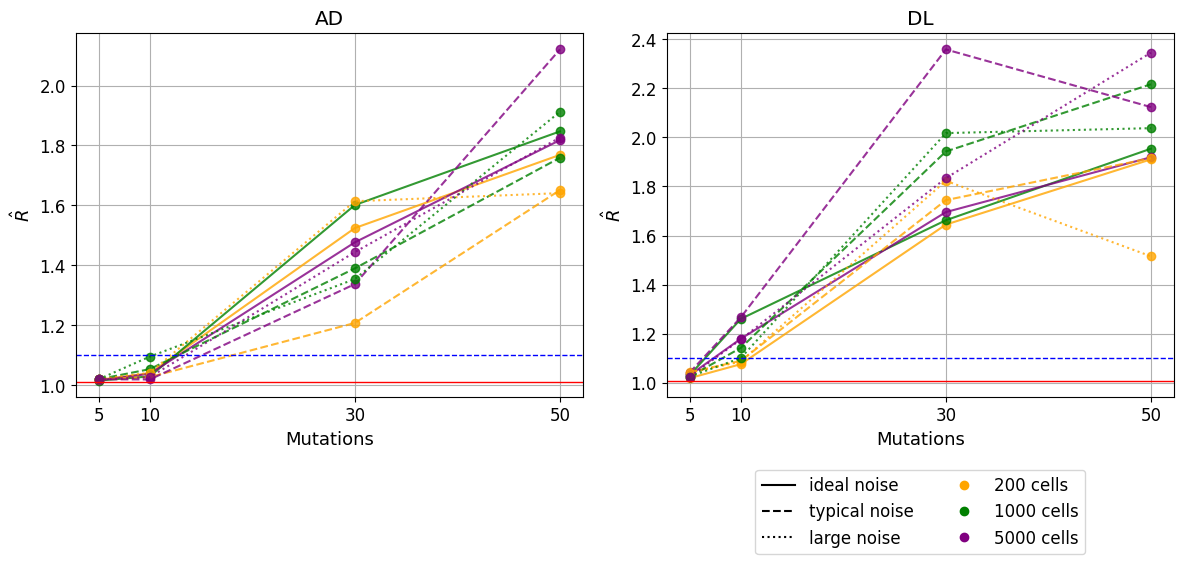

In [62]:
# make a plot with two subfigures of rhat values for AD and DL similarity
# aking noise as differnt line styles: ideal, typical, large / dashed, dotted, solid
# have mutations on x-axis and rhat on y-axis
# and number of cells as color
# and have two subplots for AD and DL similarity
# and have a legend for the noise types
# and have a legend for the number of cells

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# set font of plot
plt.rcParams.update({'font.size': 12})

# Iterate over similarity types
for sim in similarity:
    for n in noise:
        for c in cells:
            # Extract the data for the current similarity and noise and cells
            y_data = rhats.loc[dict(cells=c, noise=n, similarity=sim)]
            # Plot the data with appropriate label and linestyle
            # set the color of the line to be the number of cells
            if c == 200:
                col = 'orange'
            elif c == 1000:
                col = 'green'
            elif c == 5000:
                col = 'purple'
            # set the line style to be the noise type
            if n == "ideal":
                ls = '-'
            elif n == "typical":
                ls = '--'
            elif n == "large":
                ls = ':'

            ax = ax1 # as a placeholder
            if sim == "AD":
                ax = ax1
                ax.set_title('AD')
            elif sim == "DL":
                ax = ax2
                ax.set_title('DL')
            ax.plot(mutations, y_data, linestyle =ls, marker = "o", color=col, alpha = 0.8)

for ax in [ax1, ax2]:
    ax.set_xlabel('Mutations', fontsize=13)
    ax.set_ylabel(r"$\hat{R}$", fontsize=13)
    
    ax.set_xticks(mutations)
    ax.set_xticklabels(mutations)
    ax.set_yscale('linear')  # You can change this to 'log' if needed
    ax.grid(True)

    # specifying horizontal line type
    # see limits https://arxiv.org/pdf/1903.08008.pdf
    ax.axhline(y=1.1, color="b", linestyle="--", linewidth=1)  # type: ignore
    ax.axhline(y=1.01, color="r", linestyle="-", linewidth=1)  # type: ignore

# make fake lines for legend
# for line style
line1 = plt.plot([], [], linestyle='-', color='black', label='ideal noise')
line2 = plt.plot([], [], linestyle='--', color='black', label='typical noise')
line3 = plt.plot([], [], linestyle=':', color='black', label='large noise')
# for color
line4 = plt.plot([], [], linestyle="", marker='o', color='orange', label='200 cells')
line5 = plt.plot([], [], linestyle="", marker='o', color='green', label='1000 cells')
line6 = plt.plot([], [], linestyle="", marker='o', color='purple', label='5000 cells')

# put ledgends outside of the plot below
# Put legends below the plot
legend = plt.legend(bbox_to_anchor=(0.5, -0.2), loc="upper center", borderaxespad=0., ncol=2)
plt.tight_layout()
# save as svg
plt.savefig('rhat.svg', format='svg', dpi=1200)
plt.show()

now the same with ESS


In [7]:
## do Tail first

mutations = [5,10,30,50]
cells = [200,1000, 5000]
noise = ["ideal", "typical", "large"]
similarity = ["AD", "DL"]

# make a xarray to stare rhat values in 4D namely mutations, cells, noise, similarity
ess_tails = xr.DataArray(np.zeros((len(mutations), len(cells), len(noise), len(similarity))), dims=("mutations", "cells", "noise", "similarity"), coords={"mutations": mutations, "cells": cells, "noise": noise, "similarity": similarity})
ess_bulks = xr.DataArray(np.zeros((len(mutations), len(cells), len(noise), len(similarity))), dims=("mutations", "cells", "noise", "similarity"), coords={"mutations": mutations, "cells": cells, "noise": noise, "similarity": similarity})

# load data
datadir = '../../../../../data.nosync/mark02/analysis/rhat/'

noise_fpr_dic = {"ideal":"1e-06", "typical":"1e-06", "large":"0.01"}
noise_fnr_dic = {"ideal":"1e-06", "typical":"0.1", "large":"0.2"}

for s in similarity:
    for m in mutations:
        for c in cells:
            noise_temp = []
            for n in noise:
                # make filename
                fpr = noise_fpr_dic[n]
                fnr = noise_fnr_dic[n]
                # tail
                filename = f'T_r_{m+1}_42/{s}/rhat4-MCMCseeds_s42_s12_s34_s79-CS_42-T_r_{m+1}_42-{c}_{fpr}_{fnr}_0.0_f_UXR-iTrees_iT_r_{m+1}_45_iT_r_{m+1}_20_iT_r_{m+1}_31_iT_r_{m+1}_89-MC_{fpr}_{fnr}_10000_0_1-MPC_0.1_0.65_0.25/ess_tail.json'
                fullpath = Path(datadir + filename)
                with open(fullpath) as json_file: 
                    data = json.load(json_file)
                # get last rhat in chain
                ess_tail = data['result'][-1]
                # add to xarray rhats
                ess_tails.loc[dict(mutations=m, cells=c, noise=n, similarity=s)] = ess_tail
                print(f'{s}, {m}, {c}, {n}, {ess_tail}')

                # bulk
                filename = f'T_r_{m+1}_42/{s}/rhat4-MCMCseeds_s42_s12_s34_s79-CS_42-T_r_{m+1}_42-{c}_{fpr}_{fnr}_0.0_f_UXR-iTrees_iT_r_{m+1}_45_iT_r_{m+1}_20_iT_r_{m+1}_31_iT_r_{m+1}_89-MC_{fpr}_{fnr}_10000_0_1-MPC_0.1_0.65_0.25/ess_bulk.json'
                fullpath = Path(datadir + filename)
                with open(fullpath) as json_file: 
                    data = json.load(json_file)
                # get last rhat in chain
                ess_bulk = data['result'][-1]
                # add to xarray rhats
                ess_bulks.loc[dict(mutations=m, cells=c, noise=n, similarity=s)] = ess_bulk
                print(f'{s}, {m}, {c}, {n}, {ess_bulk}')


AD, 5, 200, ideal, 40000.0
AD, 5, 200, ideal, 116.44156808771278
AD, 5, 200, typical, 40000.0
AD, 5, 200, typical, 103.85916916088901
AD, 5, 200, large, 40000.0
AD, 5, 200, large, 104.36539961931955
AD, 5, 1000, ideal, 40000.0
AD, 5, 1000, ideal, 132.97843301598027
AD, 5, 1000, typical, 40000.0
AD, 5, 1000, typical, 105.29391359332993
AD, 5, 1000, large, 40000.0
AD, 5, 1000, large, 105.29391359332993
AD, 5, 5000, ideal, 40000.0
AD, 5, 5000, ideal, 124.61689174610262
AD, 5, 5000, typical, 40000.0
AD, 5, 5000, typical, 105.29391359332993
AD, 5, 5000, large, 40000.0
AD, 5, 5000, large, 105.29391359332993
AD, 10, 200, ideal, 40000.0
AD, 10, 200, ideal, 56.830293446978175
AD, 10, 200, typical, 40000.0
AD, 10, 200, typical, 78.00514245487507
AD, 10, 200, large, 40000.0
AD, 10, 200, large, 53.515118884462886
AD, 10, 1000, ideal, 40000.0
AD, 10, 1000, ideal, 87.24477794408996
AD, 10, 1000, typical, 40000.0
AD, 10, 1000, typical, 42.35138068550345
AD, 10, 1000, large, 40000.0
AD, 10, 1000, larg

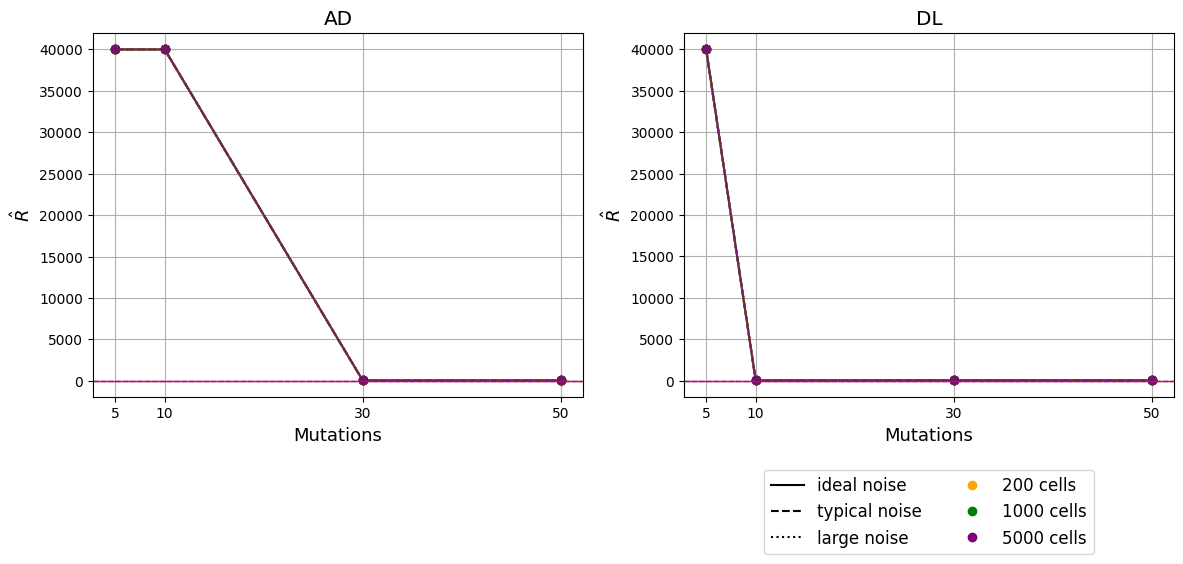

In [8]:
# ess tails

# make a plot with two subfigures of rhat values for AD and DL similarity
# aking noise as differnt line styles: ideal, typical, large / dashed, dotted, solid
# have mutations on x-axis and rhat on y-axis
# and number of cells as color
# and have two subplots for AD and DL similarity
# and have a legend for the noise types
# and have a legend for the number of cells

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# set font of plot
plt.rcParams.update({'font.size': 12})

# Iterate over similarity types
for sim in similarity:
    for n in noise:
        for c in cells:
            # Extract the data for the current similarity and noise and cells
            y_data = ess_tails.loc[dict(cells=c, noise=n, similarity=sim)]
            # Plot the data with appropriate label and linestyle
            # set the color of the line to be the number of cells
            if c == 200:
                col = 'orange'
            elif c == 1000:
                col = 'green'
            elif c == 5000:
                col = 'purple'
            # set the line style to be the noise type
            if n == "ideal":
                ls = '-'
            elif n == "typical":
                ls = '--'
            elif n == "large":
                ls = ':'

            ax = ax1 # as a placeholder
            if sim == "AD":
                ax = ax1
                ax.set_title('AD')
            elif sim == "DL":
                ax = ax2
                ax.set_title('DL')
            ax.plot(mutations, y_data, linestyle =ls, marker = "o", color=col, alpha = 0.8)

for ax in [ax1, ax2]:
    ax.set_xlabel('Mutations', fontsize=13)
    ax.set_ylabel(r"$\hat{R}$", fontsize=13)
    
    ax.set_xticks(mutations)
    ax.set_xticklabels(mutations)
    ax.set_yscale('linear')  # You can change this to 'log' if needed
    ax.grid(True)

    # specifying horizontal line type
    # see limits https://arxiv.org/pdf/1903.08008.pdf
    ax.axhline(y=1.1, color="b", linestyle="--", linewidth=1)  # type: ignore
    ax.axhline(y=1.01, color="r", linestyle="-", linewidth=1)  # type: ignore

# make fake lines for legend
# for line style
line1 = plt.plot([], [], linestyle='-', color='black', label='ideal noise')
line2 = plt.plot([], [], linestyle='--', color='black', label='typical noise')
line3 = plt.plot([], [], linestyle=':', color='black', label='large noise')
# for color
line4 = plt.plot([], [], linestyle="", marker='o', color='orange', label='200 cells')
line5 = plt.plot([], [], linestyle="", marker='o', color='green', label='1000 cells')
line6 = plt.plot([], [], linestyle="", marker='o', color='purple', label='5000 cells')

# put ledgends outside of the plot below
# Put legends below the plot
legend = plt.legend(bbox_to_anchor=(0.5, -0.2), loc="upper center", borderaxespad=0., ncol=2)
plt.tight_layout()
# save as svg
plt.savefig('ess_tails.svg', format='svg', dpi=1200)
plt.show()

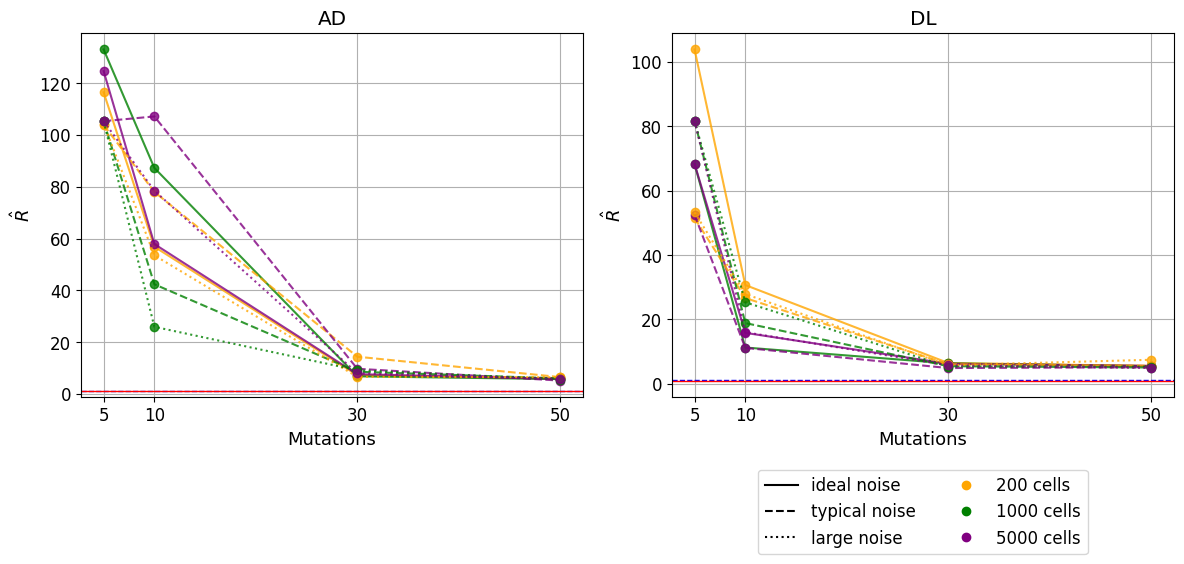

In [9]:
# ess bulk

# make a plot with two subfigures of rhat values for AD and DL similarity
# aking noise as differnt line styles: ideal, typical, large / dashed, dotted, solid
# have mutations on x-axis and rhat on y-axis
# and number of cells as color
# and have two subplots for AD and DL similarity
# and have a legend for the noise types
# and have a legend for the number of cells

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# set font of plot
plt.rcParams.update({'font.size': 12})

# Iterate over similarity types
for sim in similarity:
    for n in noise:
        for c in cells:
            # Extract the data for the current similarity and noise and cells
            y_data = ess_bulks.loc[dict(cells=c, noise=n, similarity=sim)]
            # Plot the data with appropriate label and linestyle
            # set the color of the line to be the number of cells
            if c == 200:
                col = 'orange'
            elif c == 1000:
                col = 'green'
            elif c == 5000:
                col = 'purple'
            # set the line style to be the noise type
            if n == "ideal":
                ls = '-'
            elif n == "typical":
                ls = '--'
            elif n == "large":
                ls = ':'

            ax = ax1 # as a placeholder
            if sim == "AD":
                ax = ax1
                ax.set_title('AD')
            elif sim == "DL":
                ax = ax2
                ax.set_title('DL')
            ax.plot(mutations, y_data, linestyle =ls, marker = "o", color=col, alpha = 0.8)

for ax in [ax1, ax2]:
    ax.set_xlabel('Mutations', fontsize=13)
    ax.set_ylabel(r"$\hat{R}$", fontsize=13)
    
    ax.set_xticks(mutations)
    ax.set_xticklabels(mutations)
    ax.set_yscale('linear')  # You can change this to 'log' if needed
    ax.grid(True)

    # specifying horizontal line type
    # see limits https://arxiv.org/pdf/1903.08008.pdf
    ax.axhline(y=1.1, color="b", linestyle="--", linewidth=1)  # type: ignore
    ax.axhline(y=1.01, color="r", linestyle="-", linewidth=1)  # type: ignore

# make fake lines for legend
# for line style
line1 = plt.plot([], [], linestyle='-', color='black', label='ideal noise')
line2 = plt.plot([], [], linestyle='--', color='black', label='typical noise')
line3 = plt.plot([], [], linestyle=':', color='black', label='large noise')
# for color
line4 = plt.plot([], [], linestyle="", marker='o', color='orange', label='200 cells')
line5 = plt.plot([], [], linestyle="", marker='o', color='green', label='1000 cells')
line6 = plt.plot([], [], linestyle="", marker='o', color='purple', label='5000 cells')

# put ledgends outside of the plot below
# Put legends below the plot
legend = plt.legend(bbox_to_anchor=(0.5, -0.2), loc="upper center", borderaxespad=0., ncol=2)
plt.tight_layout()
# save as svg
plt.savefig('ess_tails.svg', format='svg', dpi=1200)
plt.show()